In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 1. Titanic

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# a
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [8]:
# b
titanic['age'] = titanic['age'].fillna(titanic['age'].mean()).round(2)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.7,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [9]:
# a를 다시 계산
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.7,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [10]:
# c, 성별 생존률
titanic.pivot_table('survived', 'sex')

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic[['sex','survived']].groupby(['sex']).mean()

,survived
sex,
female,0.742038
male,0.188908


In [12]:
# c, 선실별 생존률
titanic.pivot_table('survived', 'class')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [13]:
# c, 출발지별 생존률
titanic.pivot_table('survived', 'embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [14]:
## 2. Mile Per Gallon
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
# a
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [19]:
# b
def get_mfger(full_name):
    return full_name.split()[0]

def get_model(full_name):
    return ' '.join(full_name.split()[1:])

In [17]:
a = ['I', 'am', 'a', 'student']   # ==> 'I am a student'
' '.join(x for x in a)

'I am a student'

In [18]:
' '.join(a)

'I am a student'

In [20]:
get_mfger('chevrolet chevelle malibu'), get_model('chevrolet chevelle malibu')

('chevrolet', 'chevelle malibu')

In [21]:
mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)
del mpg['name']
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [22]:
# c
mpg.pivot_table('mpg', 'cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [23]:
mpg[['mpg', 'cylinders']].groupby('cylinders').mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [24]:
# d
mpg[['origin', 'hp_per_cc']].groupby('origin').mean()

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [25]:
# e
mpg.manufacturer.value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
opel              4
subaru            4
saab              4
chevy             3
maxda             2
mercedes-benz     2
bmw               2
cadillac          2
chevroelt         1
vokswagen         1
toyouta           1
capri             1
hi                1
nissan            1
mercedes          1
triumph           1
Name: manufacturer, dtype: int64

In [29]:
s = mpg.manufacturer.value_counts()
big = s[s >= 5].index.tolist()
print(big)

['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun', 'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile', 'mazda', 'peugeot', 'fiat', 'audi', 'vw', 'volvo', 'chrysler', 'renault']


In [33]:
# in 연산자 대신에 isin() method 사용
mpg[mpg['manufacturer'].isin(big)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino


In [35]:
mpg[mpg['manufacturer'].isin(big)][['manufacturer','mpg']].groupby('manufacturer').mean()

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [36]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer')

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [37]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


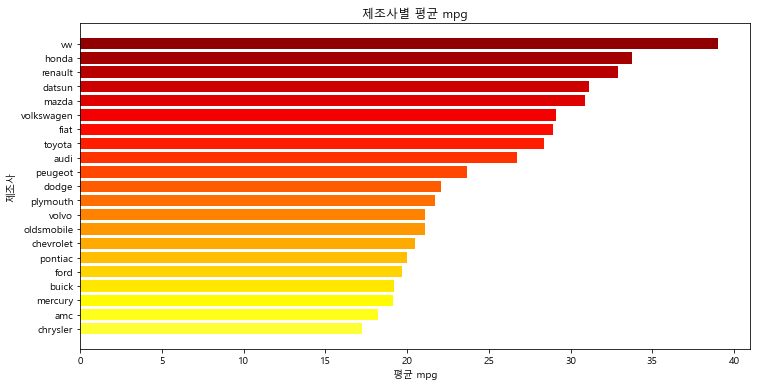

In [38]:
df = mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg')
y = np.arange(len(df.mpg))
category_colors = plt.get_cmap('hot')(np.linspace(0.8, 0.2, len(df.mpg)))
plt.figure(figsize=(12,6))
plt.barh(y, df.mpg, color=category_colors)
plt.yticks(y, df.index)
plt.xlabel('평균 mpg'); plt.ylabel('제조사')
plt.title('제조사별 평균 mpg')
plt.show()